# Customer Transaction Prediction


# 1. Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [ ]:
test.isnull().sum()

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
train.shape

(200000, 202)

In [6]:
test.shape

(200000, 201)

In [7]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


# 2.Exploratory Data Analysis

# 2.1. Univariate Analysis

Following are techniques which can be used to understand each attribute of your dataset independently:
1. Histograms.
2. Density Plots.
3. Box Plots.
4. Scatter Plots.
5. Heatmap Plots

# 2.1.1Target Variable

In [10]:
train.target.value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

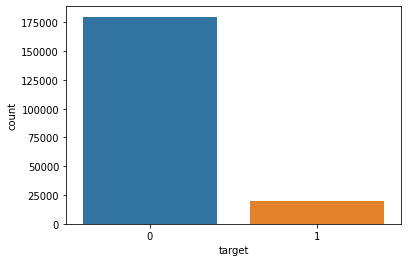

In [11]:
sns.countplot(train['target'])

<AxesSubplot:>

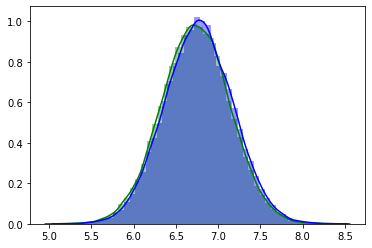

In [31]:
sns.distplot(train.mean(axis=1),color="green", label='train')
sns.distplot(test.mean(axis=1),color="blue",label='test')

So from above graphs, we can conclude that the number of customers that will not make a transaction is much higher than those that will.

Hence the data is imbalanced with respect to target variable.

# 2.1.2 Var 0

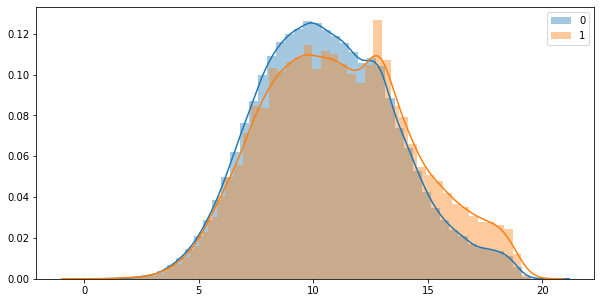

In [6]:
# distribution of var_0
fig = plt.figure(figsize=(10,5))
var_0_0 = train.loc[train['target']==0,train.columns[2]].values.reshape(-1,)
var_0_1 = train.loc[train['target']==1,train.columns[2]].values.reshape(-1,)
sns.distplot(var_0_0)
sns.distplot(var_0_1)
plt.legend([0, 1])
plt.show()

# 2.1.3 Plot var_146

<AxesSubplot:xlabel='var_146'>

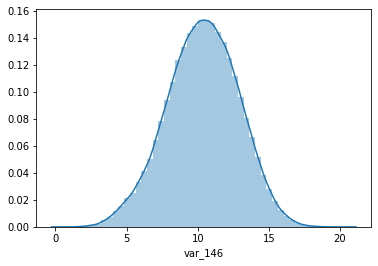

In [12]:
sns.distplot(train['var_146'])

# 2.2 Statistical Analysis

# 2.2.1 Distribution of Mean

i) Distribution of mean values per row in the train and test dataset

In [7]:
feat = train.columns.values[2:202]
feat

array(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13',
       'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19',
       'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25',
       'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31',
       'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37',
       'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43',
       'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49',
       'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55',
       'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61',
       'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67',
       'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73',
       'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79',
       'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85',
       'var_86', 'var_87', 'var_88', 'var_89', 'var_

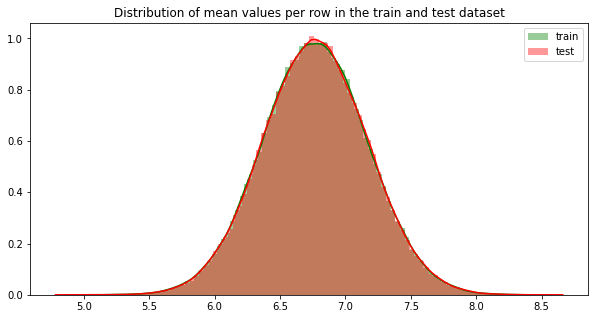

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(train[feat].mean(axis=1),color="green", kde=True,bins=100, label='train')
sns.distplot(test[feat].mean(axis=1),color="red", kde=True,bins=100, label='test')
plt.title("Distribution of mean values per row in the train and test dataset")
plt.legend()
plt.show()

Thus, we can see that distribution of mean values per row is of Standard Normal Distribution.

ii) Distribution of the mean values per columns in the train and test set

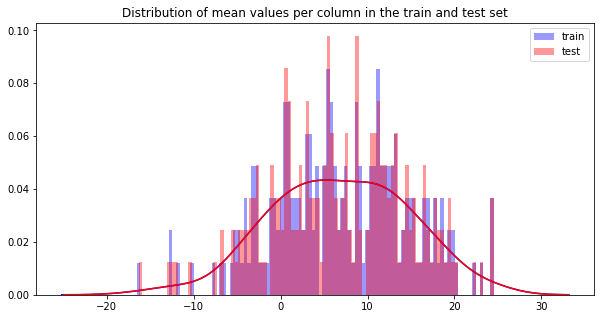

In [9]:
plt.figure(figsize=(10,5))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train[feat].mean(axis=0),color="blue",kde=True,bins=100, label='train')
sns.distplot(test[feat].mean(axis=0),color="red", kde=True,bins=100, label='test')
plt.legend()
plt.show()

Thus, we can see that distribution of mean values per column is normally distributed.

# 2.2.2 Distribution of Standard Deviation

i) Distribution of Standard Deviation values per row in the train and test dataset

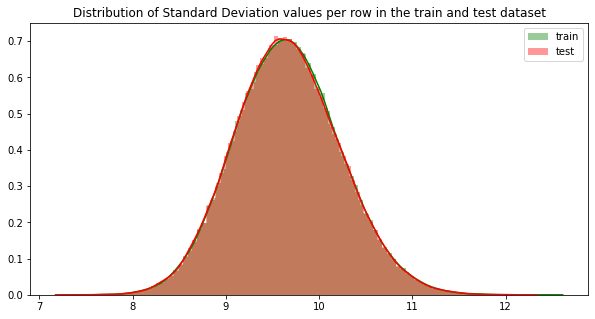

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(train[feat].std(axis=1),color="green", kde=True,bins=100, label='train')
sns.distplot(test[feat].std(axis=1),color="red", kde=True,bins=100, label='test')
plt.title("Distribution of Standard Deviation values per row in the train and test dataset")
plt.legend()
plt.show()

Thus, we can see that distribution of Standard Deviation values per row is of Standard Normal Distribution

ii) Distribution of the Standard Deviation values per columns in the train and test set.

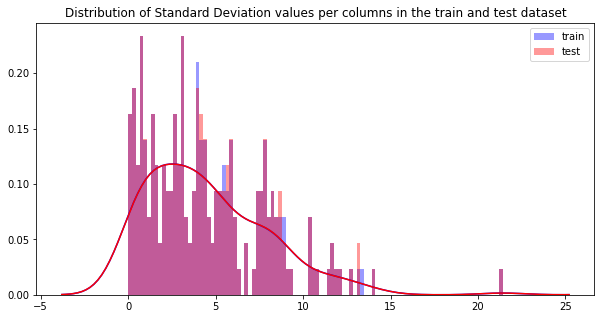

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(train[feat].std(axis=0),color="blue", kde=True,bins=100, label='train')
sns.distplot(test[feat].std(axis=0),color="red", kde=True,bins=100, label='test')
plt.title("Distribution of Standard Deviation values per columns in the train and test dataset")
plt.legend()
plt.show()

Thus, we can see that distribution of Standard Deviation values per column is Positively Skewed.

# 2.2.3 Distribution of feature grouped by Target variable

i) Distribution of mean values per row in the train set grouped by Target

In [49]:
feat = train.columns.values[2:202]
feat

array(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13',
       'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19',
       'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25',
       'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31',
       'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37',
       'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43',
       'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49',
       'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55',
       'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61',
       'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67',
       'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73',
       'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79',
       'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85',
       'var_86', 'var_87', 'var_88', 'var_89', 'var_

In [50]:
# mean values per row in the train set grouped by Target = 0
train.loc[train.target == 0][feat].mean(axis=1)

0         7.281591
1         7.076818
2         6.204483
3         6.441159
4         6.771155
            ...   
199995    6.745412
199996    6.753499
199997    6.874692
199998    6.940879
199999    6.798108
Length: 179902, dtype: float64

In [51]:
# mean values per row in the train set grouped by Target = 1
train.loc[train.target == 1][feat].mean(axis=1)

13        6.937479
29        6.581140
63        6.712044
65        6.580170
71        7.621399
            ...   
199966    6.438214
199976    6.662174
199981    6.917467
199986    7.110773
199990    6.877515
Length: 20098, dtype: float64

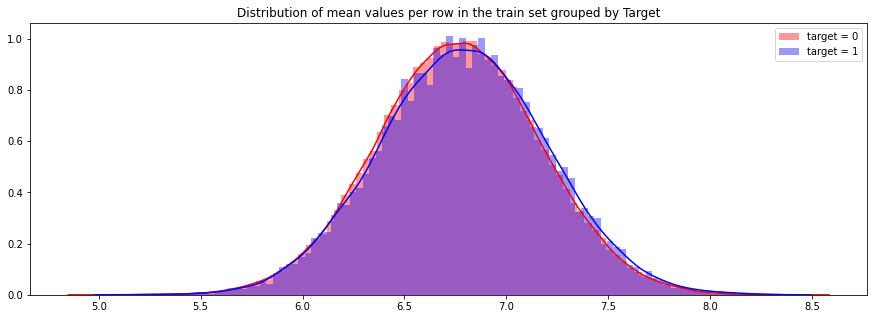

In [52]:
plt.figure(figsize=(15,5))
sns.distplot(train.loc[train.target == 0][feat].mean(axis=1),color="red", kde=True,bins=100,label='target = 0')
sns.distplot(train.loc[train.target == 1][feat].mean(axis=1),color="blue", kde=True,bins=100,label='target = 1')
plt.title("Distribution of mean values per row in the train set grouped by Target")
plt.legend()
plt.show()

ii) Distribution of mean values per column in the train set grouped by Target

In [53]:
# mean values per column in the train set grouped by Target = 0
train.loc[train.target == 0][feat].mean()

var_0      10.626681
var_1      -1.695770
var_2      10.665876
var_3       6.788979
var_4      11.072412
             ...    
var_195    -0.155601
var_196     2.260297
var_197     8.919032
var_198    15.924058
var_199    -3.415273
Length: 200, dtype: float64

In [54]:
# mean values per column in the train set grouped by Target = 1
train.loc[train.target == 1][feat].mean()

var_0      11.156418
var_1      -1.017613
var_2      11.156633
var_3       6.864113
var_4      11.131337
             ...    
var_195    -0.021130
var_196     2.688583
var_197     8.810815
var_198    15.393283
var_199    -2.532243
Length: 200, dtype: float64

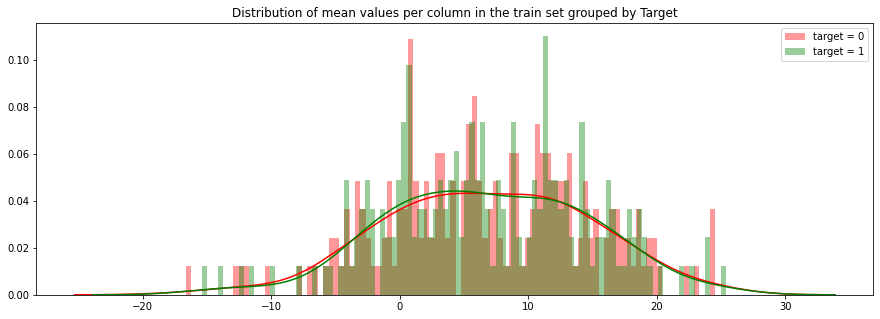

In [56]:
plt.figure(figsize=(15,5))
sns.distplot(train.loc[train.target == 0][feat].mean(),color="red", kde=True,bins=100,label='target = 0')
sns.distplot(train.loc[train.target == 1][feat].mean(),color="green", kde=True,bins=100,label='target = 1')
plt.title("Distribution of mean values per column in the train set grouped by Target")
plt.legend()
plt.show()

# 2.2.4Correlation

i) Correlation between features in train dataset

In [43]:
train.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


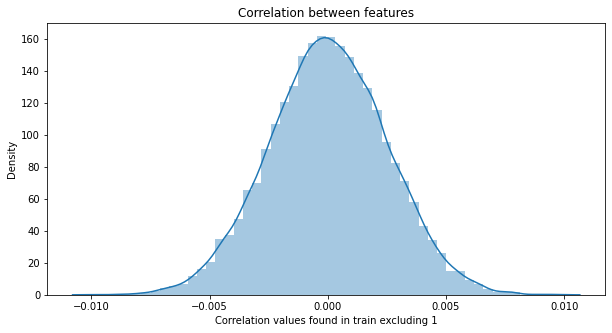

In [4]:
train_cor = train.drop(["target"], axis=1).corr()
train_cor = train_cor.values.flatten()
train_cor = train_cor[train_cor != 1]
plt.figure(figsize=(10,5))
sns.distplot(train_cor)
plt.xlabel("Correlation values found in train excluding 1")
plt.ylabel("Density")
plt.title("Correlation between features")
plt.show()

Thus, we can conclude that there is no correlation in train dataset

ii) Correlation between features in test datase

In [46]:
test.corr()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,0.004234,0.002625,0.000847,-0.004252,0.002274,0.001930,-0.004654,-0.003669,0.001427,...,0.002662,0.001151,0.001102,0.002756,-0.003509,0.001446,-0.000754,-0.000382,-0.004068,0.001248
var_1,0.004234,1.000000,0.002912,-0.002148,0.000716,0.001393,0.003567,0.003024,0.000778,-0.002643,...,0.002032,0.003477,-0.003454,0.000345,0.000126,0.001339,-0.001627,-0.002839,-0.003024,0.001861
var_2,0.002625,0.002912,1.000000,-0.005882,0.003657,0.000283,-0.001141,-0.000273,0.001231,0.000041,...,-0.001765,0.001144,-0.005496,0.002027,-0.002396,0.001333,-0.002400,-0.002726,-0.001537,0.000229
var_3,0.000847,-0.002148,-0.005882,1.000000,-0.000959,0.001644,-0.003074,0.001945,-0.001443,-0.001291,...,-0.001630,0.002119,0.001269,-0.006136,0.000289,0.001601,0.003177,0.002780,-0.002625,-0.003034
var_4,-0.004252,0.000716,0.003657,-0.000959,1.000000,0.004822,-0.003284,-0.000167,0.003138,0.000093,...,-0.003106,0.002473,-0.000734,-0.000754,-0.000427,0.003046,-0.001317,0.000425,-0.002146,0.000401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.001446,0.001339,0.001333,0.001601,0.003046,0.002676,0.000980,0.004812,-0.003241,-0.002854,...,0.000899,-0.003857,0.000587,0.001951,0.000501,1.000000,-0.001346,-0.000669,0.003914,-0.003148
var_196,-0.000754,-0.001627,-0.002400,0.003177,-0.001317,-0.002445,-0.001602,0.001645,0.002765,0.001325,...,0.000326,0.003158,-0.001467,-0.000119,-0.000542,-0.001346,1.000000,0.002297,0.003347,0.002055
var_197,-0.000382,-0.002839,-0.002726,0.002780,0.000425,-0.003665,-0.003378,0.001451,-0.002954,0.002241,...,-0.002662,-0.001184,0.002277,0.000483,-0.002226,-0.000669,0.002297,1.000000,-0.002171,0.003360
var_198,-0.004068,-0.003024,-0.001537,-0.002625,-0.002146,-0.004626,0.000943,-0.000810,-0.001544,-0.002259,...,0.000263,-0.003148,0.000584,0.000559,-0.002761,0.003914,0.003347,-0.002171,1.000000,-0.000834


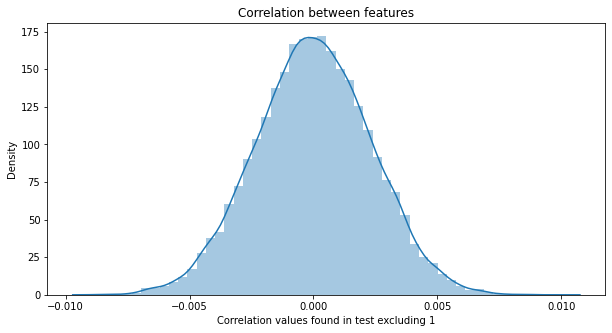

In [5]:
test_cor = test.corr()
test_cor = test_cor.values.flatten()
test_cor = test_cor[test_cor != 1]
plt.figure(figsize=(10,5))
sns.distplot(test_cor)
plt.xlabel("Correlation values found in test excluding 1")
plt.ylabel("Density")
plt.title("Correlation between features")
plt.show()

Thus, we can conclude that there is no correlation in test dataset

# 3. Data Preprocessing

This dataset contains 200 numeric feature variables and 1 binary target.

Both training set and testing set have 200 thousands rows.

Methods can be used:
* Handling Null Values
* Standardization
* Handling Categorical Variables
* One-Hot Encoding

# 3.1 Checking the Null Values 

In [10]:
train.isnull().sum().sum()

0

In [11]:
test.isnull().sum().sum()

0

Hence, there are no missing values in train as well as test data.

# 3.2  Outlier Handling

In [18]:
# Data Preprocessiing

# Remove outliers
train_x = train.iloc[:, 1:]
IQR = train_x.quantile(.75) - train_x.quantile(.25)
print("Train.shape:",train.shape)
df_in = train[~((train_x < (train_x.quantile(.25) - 1.5 * IQR)) |(train_x > (train_x.quantile(.75) + 1.5 * IQR))).any(axis=1)]
df_out = train[((train_x < (train_x.quantile(.25) - 1.5 * IQR)) |(train_x > (train_x.quantile(.75) + 1.5 * IQR))).any(axis=1)]
print("df_in.shape:",df_in.shape)
print("df_out.shape:",df_out.shape)

Train.shape: (200000, 202)
df_in.shape: (157999, 202)
df_out.shape: (42001, 202)


In [19]:
print("df_in.target:\n", df_in['target'].value_counts())
print("df_out.target:\n", df_out['target'].value_counts())

df_in.target:
 0    157999
Name: target, dtype: int64
df_out.target:
 0    21903
1    20098
Name: target, dtype: int64


1. <b>Observation: </b>
All the outliers include our class1 target, so we cannot remove them.

In [12]:
train=train.sample(frac=0.5,replace=True,random_state=1)

In [13]:
test=test.sample(frac=0.25,replace=True,random_state=1)

In [14]:
train.shape

(100000, 202)

In [15]:
test.shape

(50000, 201)

In [16]:
train.drop('ID_code', axis=1, inplace=True)
test.drop('ID_code', axis=1, inplace=True)

In [17]:
x = train.drop(['target'], axis=1)
y = train['target']

In [18]:
x

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
128037,10.3052,-0.5095,5.7336,10.2223,12.4925,-7.7469,5.3978,16.1991,-3.3141,5.4593,...,8.1753,7.6818,0.0088,4.7553,18.5921,0.3875,4.3689,9.3401,13.7590,-7.6117
5192,9.4948,-6.8253,6.6556,3.0573,7.1148,-2.7721,5.7098,17.0420,1.9718,5.8192,...,-0.4712,2.6702,2.3926,-3.0008,13.7625,0.8220,9.4688,9.0408,15.2757,-11.8081
50057,12.0170,5.4754,8.4844,9.4358,13.2487,-8.8637,5.5079,19.5067,5.3335,8.3122,...,-0.3862,7.7258,1.3497,1.7238,16.5886,-0.5715,6.2983,8.3225,14.1768,-12.4458
109259,7.6686,1.4593,7.8416,5.1277,8.7013,-2.7651,5.8326,19.2118,-1.9412,5.6849,...,-1.0219,9.3207,0.4347,-1.0619,23.6634,-0.3281,9.2316,9.5958,16.7079,10.8066
73349,12.0505,-3.5482,10.2906,4.7645,12.2042,-9.8792,5.0381,17.1060,-2.1744,6.7185,...,1.6586,2.1293,4.0964,3.4685,17.3254,0.1280,4.4493,7.3625,15.3782,7.3929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173974,6.1106,-7.5218,12.3751,4.1540,9.9270,-16.8777,6.0523,17.7308,4.2462,6.6645,...,13.0904,4.3733,0.4909,3.4699,23.0018,-2.7823,3.3860,9.9488,16.7400,6.0322
187877,9.8565,2.4162,11.9897,5.0786,10.3558,-6.5770,4.4830,19.6483,-5.5687,5.2624,...,6.4649,3.1077,0.1531,-6.5773,17.9320,-0.8222,-5.0622,9.6602,14.2636,-14.4987
119921,7.0569,-5.8079,13.5181,6.6835,8.1739,-7.7899,5.1024,18.0091,2.6016,8.0015,...,0.3893,9.1128,1.9742,4.4964,19.7080,-2.6613,9.6491,9.6318,21.7992,-16.2997
71360,9.3524,3.4682,11.8687,7.9028,10.8158,-17.3525,4.9887,19.5098,-0.9459,6.8160,...,1.7315,5.8482,2.9093,2.2283,17.4692,-0.7854,0.4511,8.9573,17.2971,4.0662


# 3.3 Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler_df = pd.DataFrame(x_scaler, columns=x.columns)

In [20]:
x_scaler_df

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.119869,0.281848,-1.882912,1.675329,0.867769,-0.339605,-0.009464,-0.100525,-1.081262,-1.708048,...,1.089278,0.081369,-1.301031,0.355201,0.195777,0.372990,0.378355,0.468590,-0.692652,-0.410950
1,-0.386084,-1.282439,-1.533485,-1.829059,-2.445878,0.291944,0.349507,0.145893,0.504223,-1.416742,...,-0.811385,-1.574555,0.310232,-1.583850,-1.345174,0.677139,1.315555,0.144345,-0.191002,-0.812963
2,0.442454,1.764178,-0.840390,1.290653,1.333727,-0.481383,0.117212,0.866438,1.512552,0.601113,...,-0.792701,0.095908,-0.394687,-0.402684,-0.443467,-0.298308,0.732918,-0.633824,-0.554464,-0.874055
3,-0.985987,0.769477,-1.084004,-0.816431,-1.468304,0.292832,0.490795,0.780225,-0.669466,-1.525445,...,-0.932440,0.622892,-1.013156,-1.099118,1.813845,-0.127929,1.271965,0.745602,0.282699,1.353517
4,0.453459,-0.470772,-0.155860,-0.994071,0.690124,-0.610300,-0.423316,0.164604,-0.739413,-0.688841,...,-0.343215,-1.753279,1.461867,0.033497,-0.208381,0.191340,0.393130,-1.673837,-0.157100,1.026486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.497787,-1.454947,0.634142,-1.292665,-0.713048,-1.498758,0.743570,0.347261,1.186421,-0.732549,...,2.169709,-1.011820,-0.975169,0.033847,1.602753,-1.845864,0.197730,1.128023,0.293316,0.896131
99996,-0.267266,1.006480,0.488080,-0.840445,-0.448829,-0.191087,-1.061986,0.907834,-1.757520,-1.867420,...,0.713300,-1.429997,-1.203495,-2.477987,-0.014837,-0.473798,-1.354781,0.815370,-0.525755,-1.070722
99997,-1.186930,-1.030451,1.067326,-0.055492,-1.793279,-0.345064,-0.349336,0.428621,0.693129,0.349630,...,-0.622231,0.554198,0.027426,0.290475,0.551820,-1.761164,1.348688,0.784603,1.966651,-1.243257
99998,-0.432862,1.267038,0.442222,0.540866,-0.165385,-1.559033,-0.480153,0.867344,-0.370930,-0.609923,...,-0.327191,-0.524486,0.659480,-0.276557,-0.162500,-0.448038,-0.341612,0.053885,0.477578,0.707789


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaler_df, y, test_size=0.25, random_state=42)

In [22]:
X_train.shape, y_train.shape

((75000, 200), (75000,))

In [23]:
X_train

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
98980,-1.098399,-0.177645,1.209598,1.782441,-0.067658,2.174468,-0.580021,-0.339985,1.099916,-1.852122,...,-0.753002,0.599267,-0.934411,-0.143456,0.329752,0.357590,1.061734,-0.251402,0.282302,0.883725
69824,-0.512622,-0.236964,-0.785512,-1.547632,0.117320,0.385531,0.528303,0.870853,-1.106457,0.028943,...,-0.810242,0.842521,-0.215974,1.399365,0.499398,0.496399,1.381142,-2.304236,-0.136792,1.543479
9928,1.084044,0.340696,-0.466252,-0.367585,1.276853,-0.211069,-0.266841,-0.911989,0.331124,-0.373495,...,1.782982,-0.256649,-0.273359,1.125911,0.804136,1.004598,0.442160,1.411319,0.677649,-0.832277
75599,-0.898837,1.759076,-0.863546,-0.198553,1.247769,-0.597351,1.375452,0.110461,0.435236,0.795614,...,2.091300,-1.218563,0.467856,-1.519924,0.496782,-0.378108,-0.825749,0.321363,-1.742918,1.476754
95621,-0.342525,-0.542549,-0.234008,-1.304795,0.455296,1.137606,-0.636052,0.972794,-1.240293,-0.873224,...,0.690900,-1.146498,-1.347737,-0.515936,0.324647,-0.959176,2.113421,-0.737608,0.008771,-1.918932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.407633,-1.581213,-0.462955,0.988244,-0.815027,0.743783,-0.617299,-1.276661,-1.308471,0.923986,...,2.052568,-1.059202,-0.094578,-2.359435,-0.996437,0.669089,0.764453,0.231012,-0.380258,0.261679
54886,0.162442,-0.898017,-0.551032,1.213082,-0.279748,0.369332,-0.445637,-1.830013,0.768116,1.447916,...,-0.376540,0.241292,0.818930,1.315064,-0.535390,-0.393928,0.588182,0.436523,0.335189,-0.928824
76820,1.058519,-0.016827,1.116102,1.413612,1.883424,1.141745,0.207875,0.236199,-1.962564,0.604918,...,-0.830466,-0.262927,1.116877,1.094236,-0.273693,1.474646,0.762174,0.144886,0.378782,-0.684784
860,0.570732,-1.054798,0.231239,0.906026,0.261199,-1.742780,-0.562993,0.912921,0.038287,1.647112,...,0.119921,-1.015256,-1.101769,0.737881,-0.420399,-0.841717,0.721138,-1.200197,-0.191796,0.277620


In [24]:
y_train

198544    1
123355    0
106318    0
60020     0
45655     0
         ..
8533      0
187627    0
91669     1
5940      0
117291    0
Name: target, Length: 75000, dtype: int64

In [25]:
X_test.shape

(25000, 200)

In [26]:
X_test

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
75721,2.612513,-0.083800,0.693226,-0.654001,-1.365155,-0.831066,-0.263160,1.323345,0.534158,-0.962744,...,-1.254452,-1.000387,0.099276,0.849733,-1.644168,1.296847,0.476341,-0.533181,-0.931288,0.525789
80184,2.606107,1.130369,0.407696,-0.414196,0.691664,-0.929071,0.693291,-1.235704,0.458511,-1.316618,...,0.236491,-0.719697,-0.183124,-0.439460,-0.187419,-1.206415,0.705996,-0.873352,1.321323,1.316108
19864,-0.737873,0.883335,2.441236,0.181476,-0.305751,0.933357,-0.017978,-0.042260,0.334034,-0.791797,...,-0.279952,-1.006963,1.488025,1.355890,-1.072406,-0.496828,-0.385569,1.182732,0.466927,0.642368
76699,-1.499988,-1.156395,-0.442262,-0.769868,-0.749958,1.420247,1.471637,1.916778,-0.518773,-0.901472,...,0.123987,-0.281628,-2.889109,0.878358,0.633852,0.336520,0.703203,0.190712,-1.405949,0.904753
92991,-1.421510,-0.667800,1.395189,-0.864118,0.958533,1.861080,-0.117960,-0.305839,-1.734245,-0.356174,...,0.500075,-0.287411,1.229418,0.966659,1.875935,-1.261715,0.721010,1.246433,1.086225,0.983041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21271,1.265966,-0.708444,-0.581048,1.103769,1.467131,0.941253,1.717510,1.104554,-0.140331,1.073484,...,-0.891729,-2.036579,-0.584419,0.413177,-2.140472,-1.226505,0.208682,-0.118584,-2.374387,-1.259419
34014,0.319201,0.801155,-0.190993,1.079705,2.040366,-0.894452,1.204135,-0.193286,0.630920,0.894848,...,0.540236,-1.203198,0.700036,0.778532,-0.500133,0.943558,0.203224,-0.197018,-0.894244,-0.670394
81355,0.109488,-0.056406,0.029882,0.493227,0.434223,0.205034,0.700310,0.010450,0.046895,1.114683,...,0.662653,-1.822435,-0.488235,1.926547,1.192820,-1.310225,-0.298922,-0.475655,-0.195963,0.148128
65720,-0.677922,-0.013707,-0.215665,-1.075702,1.744290,1.206908,-0.761807,1.557193,-1.825398,0.234290,...,-0.531534,0.393317,0.548426,0.277650,0.541323,-0.586357,0.777592,0.093102,0.053853,-0.182410


# 4. Balancing the dataset

SMOTE: class imbalance
SMOTE sampling on the training data such that even number of observations with each class
This funciton also does 80/20 train/test split

SMOTE: synethic minority over-sampling technique
Synthesize new examples for the minority class rateher than oversample, which doesn't add any new information.

"… SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b"

In [27]:
from imblearn.over_sampling import SMOTE
smk  = SMOTE()
X_train,y_train = smk.fit_resample(X_train,y_train)

In [28]:
y_train.value_counts()

0    67403
1    67403
Name: target, dtype: int64

y_train.shape

<AxesSubplot:ylabel='target'>

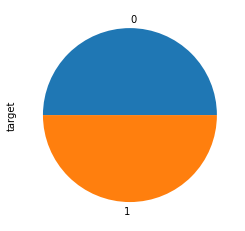

In [27]:
y_train.value_counts().plot(kind="pie")

# 5. Model Building

# Decision Tree 

In [28]:
clf= DecisionTreeClassifier()

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,4,1),
    'min_samples_leaf' : range(1,4,1),
    'min_samples_split': range(2,4,1),
    'splitter' : ['best', 'random']
    
}
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=3,
                    n_jobs =-1)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 4),
                         'splitter': ['best', 'random']})

In [29]:
best_parameters = grid_search.best_params_
print(best_parameters)

print('Training Accuracy score is ', grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Training Accuracy score is  0.5900257890691013


In [31]:
clf= DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf= 2, min_samples_split= 2, splitter='best')

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)

print('\n****Test auc for max depth = 3 and  criteria=gini is %f%%' % (acc))


****Test auc for max depth = 3 and  criteria=gini is 0.528520%


# K Nearest Neighbors

In [28]:
log_regress = KNeighborsClassifier()
c = [1,3,5,7,9,11]



for i in c:
    lr = KNeighborsClassifie(n_neighbors=i)
    lr.fit(X_train, y_train)
    pred = lr.predict(X_train)
    auc = accuracy_score(y_train, pred)
    print('\nTrain auc for n_neighbors = %f is %f%%' % (i, auc))


Train auc for n_neighbors = 1.000000 is 0.802598%

Train auc for n_neighbors = 3.000000 is 0.802598%

Train auc for n_neighbors = 5.000000 is 0.802598%

Train auc for n_neighbors = 7.000000 is 0.802598%

Train auc for n_neighbors = 9.000000 is 0.802598%

Train auc for n_neighbors = 11.000000 is 0.802598%


In [29]:
knn =KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [30]:
print("Testing accuracy score of Logistic Regression:", accuracy_score(pred, y_test), "\n")

Testing accuracy score of Logistic Regression: 0.78596 



# Naive Bayes

In [45]:
model = MultinomialNB()

alpha = [0.0001, 0.001, 0.01,  0.1, 1, 10, 100]



for i in alpha:
    lr = MultinomialNB(alpha=i)
    lr.fit(X_train, y_train)
    pred = lr.predict(X_train)
    auc = accuracy_score(y_train, pred)
    print('\nTrain auc for alpha = %f is %f%%' % (i, auc))
    



Train auc for alpha = 0.000010 is 0.804593%

Train auc for alpha = 0.000100 is 0.805884%

Train auc for alpha = 0.001000 is 0.806329%

Train auc for alpha = 0.010000 is 0.806351%

Train auc for alpha = 0.100000 is 0.806396%

Train auc for alpha = 1.000000 is 0.806403%

Train auc for alpha = 10.000000 is 0.806403%

Train auc for alpha = 100.000000 is 0.806403%


In [46]:
lr = MultinomialNB(alpha=10)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [47]:
# get accuracy
print("Testing accuracy score of Naive Bayes is:", accuracy_score(pred, y_test), "\n")

Testing accuracy score of Naive Bayes is: 0.78808 



# Random Forest Algorithm

In [36]:
param_grid={'n_estimators': [10,20,50], 'max_depth':[1, 5, 10, 50]}

Rf = RandomForestClassifier()
grid = GridSearchCV(Rf, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

optimal_learners = grid.best_estimator_.n_estimators

print("The optimal number of base learners is : ",optimal_learners)

optimal_depth = grid.best_estimator_.max_depth
print("\nThe optimal value of depth is : ",optimal_depth)

print('Train Accuracy score is ', grid.best_score_)

The optimal number of base learners is :  50

The optimal value of depth is :  50
Train Accuracy score is  0.9744078281015133


In [28]:

rf = RandomForestClassifier(n_estimators= 50, max_depth= 5, n_jobs= -1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
acc = accuracy_score(y_test, pred)

print('\n****Test auc for max depth = 500 and base learners =500 is %f%%' % (acc))




****Test auc for max depth = 50 and base learners =50 is 0.929280%


# 6. Conclusion

In [51]:
dicti= { 'Decision Tree' : [59.00,52.82],'Random Forest Algorithm':[97.44,92.92],
       'Naive Bayes':[80.64,78.67], 'KNN':[80.25,78.59]}

In [52]:
df= pd.DataFrame.from_dict(data=dicti,orient='index',columns= ['Training Accuracy','Testing Accuracy'])

In [53]:
df

,Training Accuracy,Testing Accuracy
Decision Tree,59.00,52.82
Random Forest Algorithm,97.44,92.92
Naive Bayes,80.64,78.67
KNN,80.25,78.59
